---

# TP1 : Traitement de fichiers, cryptanalyse, César et de Vigenère

Dans ce TP, on commence par effectuer quelques traitements sur des fichiers et des chaînes de caractères (`string`), puis on reprend la cryptanalyse du chiffrement de César et on la réinvestit dans la cryptanalyse du chiffrement de De Vigenère. 

Vous pourrez donc récupérer en partie le travail effectué en TD2 (objectif 20) et en TP1.




## Echauffement

### Retour sur le codage ascii

On rappelle l'énoncé de l'exercice 7 du TD2. 

L’ASCII est un codage de caractères qui définit 128 codes sur 7 bits. 
Chaque code correspond à un caractère : chiffres, lettres, symboles mathématiques et de ponctuation. 

En Python :
- la fonction `ord()` retourne le code ASCII d’un caractère fourni en argument,   
- la fonction `chr()` retourne le caractère associé à un code donné.  

Ecrire un programme qui affiche :
- le code ascii des majuscules 
- la table des 128 codes ASCII.


In [83]:
# ENTRER VOTRE CODE ICI
#raise NotImplementedError()
!pip install unidecode
import unidecode
import matplotlib.pyplot as plt
import random
import math


listeMaj = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


print('\nCode ASCII des majuscules : \n')
for char in range(len(listeMaj)):
    print(listeMaj[char] + ' : ' + str(ord(listeMaj[char])))

print('\n128 caractères ASCII : \n')
for i in range(128):
    print(str(i) + ' : ' + str(chr(i)))

/home/shahin/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/shahin/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(

Code ASCII des majuscules : 

A : 65
B : 66
C : 67
D : 68
E : 69
F : 70
G : 71
H : 72
I : 73
J : 74
K : 75
L : 76
M : 77
N : 78
O : 79
P : 80
Q : 81
R : 82
S : 83
T : 84
U : 85
V : 86
W : 87
X : 88
Y : 89
Z : 90

128 caractères ASCII : 

0 :  
1 : 
2 : 
3 : 
4 : 
5 : 
6 : 
7 : 
8 :
9 : 	
10 : 

11 : 
12 : 
13 : 
14 : 
15 : 
16 : 
17 : 
18 : 
19 : 
20 : 
21 : 
22 : 
23 : 
24 : 
25 : 
26 : 
27 : 
28 : 
29 : 
30 : 
31 : 
32 :  
33 : !
34 : "
35 : #
36 : $
37 : %
38 : &
39 : '
40 : (
41 : )
42 : *
43 : +
44 : ,
45 : -
46 : .
47 : /
48 : 0
49 : 1
50 : 2

## Traitement

### Préparation syntaxique

Dans le but de faire quelques traitements statistiques, et des chiffrements ultérieurs éventuels, écrire la fonction `traitementChaine()` qui :
- convertit la chaîne en minuscules (c'est conseillé, ça facilite la suite)
- remplace les caractères accentués par les caractères non accentués correspondants ;
- élimine les espaces, la ponctuation et les chiffres, sans oublier les retours à la ligne, les guillemets et autres tirets ... ; 
- enfin, convertit le tout en majuscules et renvoie la chaîne de caractères résultat.

On rappelle ici les méthodes utiles `.lower()`, `.upper()` et `.isalpha()`, pour le traitement des chaînes de caractères (type `string`) et présentées en cours (chapitre 3 : types composés).

In [84]:
# ENTRER VOTRE CODE ICI
#raise NotImplementedError()
def traiteChaine(chaine):
    chaine = chaine.lower()

    i = 0
    while(i < len(chaine)):
        if chaine[i].isalpha() == False:
            chaine = chaine.replace(chaine[i], '')
        i += 1


    chaine = unidecode.unidecode(chaine, "utf-8")
    chaine = unidecode.unidecode(chaine)
    res = chaine.upper()
    return res

### Vérification
Vérifier le bon comportement de votre fonction `traitement Chaine()` sur une chaîne de caractères entrée au clavier.  

In [85]:
# ENTRER VOTRE CODE ICI
#raise NotImplementedError()

chaine = input()
print(traiteChaine(chaine))

SHAHINENMASTER


### Application à un fichier texte

Vous trouverez dans le dossier le fichier d'entrée `93.txt`, le roman bien connu de Victor Hugo (dont on vous conseille vivement la lecture !).

Effectuer le traitement suivant à l'aide de la fonction `traitementChaine()`. 
- Ouvrir et lire le contenu de ce fichier d'entrée, 
- effectuer la préparation syntaxique définie précédemment, 
- sauvegarder le résultat du traitement dans un nouveau fichier de sortie dénommé `93Out.txt`.


In [86]:
# ENTRER VOTRE CODE ICI
#raise NotImplementedError()
fichier = open('93.txt', 'r')
texte = fichier.read()
fichier.close()

sortie = traiteChaine(texte)

fichier = open('93Out.txt', 'w')
fichier.write(sortie)
fichier.close()

### Autres vérifications
Vérifier l'effet de votre préparation :
- en regardant sous l'éditeur le fichier texte généré,  
- ou à l'aide de la commande Unix `wc`  

In [87]:
# ENTRER VOTRE CODE ICI
#raise NotImplementedError()
!wc 93Out.txt

     0      1 532904 93Out.txt


### Traitements statistiques


#### Apparition de lettres : dénombrement, fréquences
Dans ce qui suit, on considère une chaîne de caractères arbitraire _mais_ en majuscules, sans espace ni ponctuction.  

Pour un telle chaîne, écrire les fonctions :
- `nb_apparitions()` qui compte le nombre d'apparitions de chacune des lettres majuscules (de 'A' à 'Z') dans cette chaîne ;
- `frequences()` qui calcule les fréquences de ces apparitions dans cette chaîne ;
    - cette fonction permettra de sauvegarder _éventuellement_ ces fréquences dans un fichier de sortie ;
    - dans ce cas, le nom du fichier sera défini comme un paramètre de cette fonction.
    - Chaque ligne du fichier respectera le format suivant :
    ```A	9.180%```

**Rmq.** Vous pouvez reprendre et adapter les développements du TP1.  

In [88]:
# ENTRER VOTRE CODE ICI
#raise NotImplementedError()
def nombreApparitions(chaine):
    apparitions = dict()
    for maj in listeMaj:
        apparitions[maj] = 0

    for char in chaine:
        for maj in listeMaj:
            if(maj == char):
                apparitions[maj] += 1

    return apparitions


def frequences(nombreApparitions, chaine):
    freq = nombreApparitions.copy()
    for key, value in nombreApparitions.items():
        freq[key] = round((value / len(chaine)) * 100, 2)

    return freq

#### Application à 93, roman de V. Hugo

On dispose maintenant d'un fichier `93Out.txt` contenant une chaîne de caractères composée uniquement de majuscules, sans espace ni ponctuation. 
On peut procéder au calcul de quelques statistiques.

- Appliquer les fonctions précédentes au contenu du fichier `93Out.txt` et 
- tracer (avec `matplotlib`) les histogrammes de ces apparitions et des fréquences
- sauvegarder les fréquences dans un fichier `freq93.txt`
- sauvegarder les histogrammes dans des fichiers images `hist_app93.png`et `hist_freq93.png`     

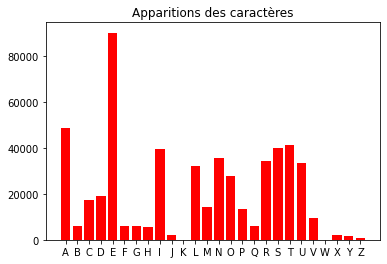

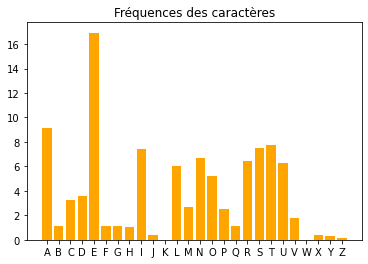

In [89]:
# ENTRER VOTRE CODE ICI
#raise NotImplementedError()
apparitions = nombreApparitions(sortie)
freq = frequences(apparitions, sortie)

fichier = open('freq93.txt', 'w')
for key, value in freq.items():
    fichier.write(str(key) + " : " + str(value) + "%\n")
fichier.close()

plt.bar(listeMaj, apparitions.values(), color='red')
plt.title('Apparitions des caractères')
plt.draw()
plt.savefig('hist_app93.png')
plt.show()

plt.bar(listeMaj, freq.values(), color='orange')
plt.title('Fréquences des caractères')
plt.draw()
plt.savefig('hist_freq93.png')
plt.show()

#### Apparitions de digrammes
Un _digramme_ (ou _bigramme_) est un motif de deux lettres.  
On considère les digrammes suivants :
'ES','DE','LE','EN','RE','NT','ON','ER','TE','EL','AN','SE','ET','LA','AI','IT','ME','OU','EM','IE'.

- Ecrire une fonction `nb_digrammes()` qui compte le nombre d'apparitions d'un bigramme donné dans une chaîne de caractères arbitraire.

In [90]:
# ENTRER VOTRE CODE ICI
#raise NotImplementedError()
digrammes = ['ES','DE','LE','EN','RE','NT','ON','ER','TE','EL','AN','SE','ET','LA','AI','IT','ME','OU','EM','IE']
def nombreDigrammes(digrammes, chaine):
    apparitionsBigrammes = dict()

    for dig in digrammes:
        apparitionsBigrammes[dig] = 0

    for char in range(1, len(chaine)):
        for dig in digrammes:
            if(str(chaine[char - 1]) + str(chaine[char]) == dig):
                apparitionsBigrammes[dig] += 1

    return apparitionsBigrammes

- Appliquer cette fonction au contenu du fichier `93Out.txt` 
    - les nombres d'apparitions de digrammes seront stockés avec un dictionnaire adapté
- et tracer un premier histogramme d'apparition des digrammes définis ci-dessus.

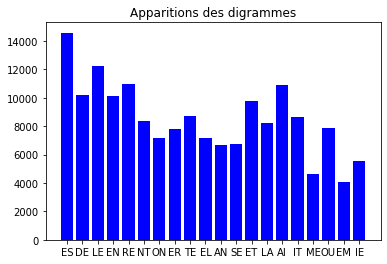

In [91]:
# ENTRER VOTRE CODE ICI
#raise NotImplementedError()
apparitionsBigrammes = nombreDigrammes(digrammes, sortie)

plt.bar(apparitionsBigrammes.keys(), apparitionsBigrammes.values(), color='blue')
plt.title('Apparitions des digrammes')
plt.show()

#### Histogramme ordonné 

Reprendre les valeurs d'apparitions précédentes et tracer un histogramme ordonnés par nombre d'apparitions décroissant. 

**Indication :** Un dictionnaire python est une structure de donnée non ordonnable. 

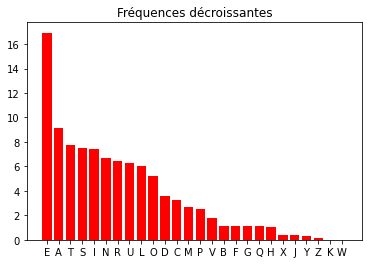

Text(0.5, 1.0, 'Apparitions décroissantes des digrammes')

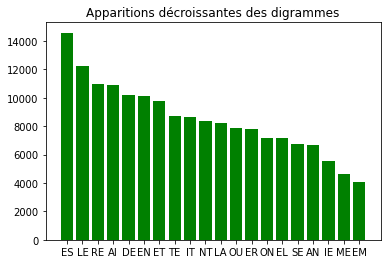

In [92]:
# ENTRER VOTRE CODE ICI
#raise NotImplementedError()

freqDecroissantes = {k: v for k, v in sorted(freq.items(), key=lambda item: item[1], reverse=True)}
apparitionsDigrammesDecroissantes = {k: v for k, v in sorted(apparitionsBigrammes.items(), key=lambda item: item[1], reverse=True)}

plt.bar(freqDecroissantes.keys(), freqDecroissantes.values(), color='red')
plt.title('Fréquences décroissantes')
plt.show()

plt.bar(apparitionsDigrammesDecroissantes.keys(), apparitionsDigrammesDecroissantes.values(), color='green')
plt.title('Apparitions décroissantes des digrammes')

### Analyse
Comparer vos statistiques avec les fréquences des lettres et bigrammes données pour la langue française (par exemple : http://www.apprendre-en-ligne.net/crypto/stat/francais.html ).  
Conclure quant au roman de Victor Hugo.

VOTRE REPONSE ICI

## 2 César

### Chiffrement de César

Écrire un premier programme qui :
- lit une chaîne de caractères arbitraire entrée au clavier ;
- effectue le traitement de cette chaîne avec la fonction `traitementChaine()` écrite plus haut ;
- définit une fonction `cesar()` prenant en entrée la chaîne de caractères et une clé de chiffrement $k \in \{0,\ldots,25\}$  
    - la clé est entrée au clavier, 
    - ou choisie aléatoirement (par exemple si la clé entrée au clavier est négative);
- puis détermine la chaîne de caractères chiffrée,
- et l'affiche à l'écran.

**Rmq.** La valeur entière $k$ définit le nombre de décalages du chiffrement de César. 
$k$ est aussi l'indice (compté à partir de 0) d'une lettre de l'alphabet 'A', 'B', ... , 'Z'.

In [93]:
# ENTRER VOTRE CODE ICI
#raise NotImplementedError()
def cesar(chaine, k):
    numeroChar = 0
    res = ''
    for char in chaine:
        for i in range(len(listeMaj)):
            if(char == listeMaj[i]):
                numeroChar = (i + k) % 26
                res += listeMaj[numeroChar]
                numeroChar = 0

    return res

print("Entrez un chaine à chiffrer : ")
chaine = input()
print("\nEntrez une clé de chiffrement entre 0 et 25 : ")
k = input()


chaineTraitee = traiteChaine(chaine)
chaineChiffree = cesar(chaineTraitee, int(k))
print("\nChaine chiffrée = " + chaineChiffree)

Entrez un chaine à chiffrer : 

Entrez une clé de chiffrement entre 0 et 25 : 

Chaine chiffrée = XMFMNSJSRFXYJW


### Déchiffrer César avec sa clé  

Compléter ce code avec une fonction `decesar()` qui détermine le message clair à partir d'un message chiffré et d'une clé de chiffrement donnée. 
Appliquer cette fonction au traitement précédent et vérifier la correction des deux étapes.  

In [94]:
# ENTRER VOTRE CODE ICI
#raise NotImplementedError()
def decesar(chaine, k):
    numeroChar = 0
    res = ''
    for char in chaine:
        for i in range(len(listeMaj)):
            if(char == listeMaj[i]):
                numeroChar = (i - k) % 26
                res += listeMaj[numeroChar]
                numeroChar = 0

    return res

print("\nEntrez une clé de chiffrement entre 0 et 25 : ")
k = input()
print(k)
chaineDechiffree = decesar(chaineChiffree, int(k))
print("\nChaine déchiffrée = " + chaineDechiffree)


Entrez une clé de chiffrement entre 0 et 25 : 
5

Chaine déchiffrée = SHAHINENMASTER


### Première application

Une fois ce chiffrement validé, modifier les deux traitements précédents pour que la chaîne de caractères à chiffer soit le texte défini dans le fichier d'entrée `In.txt` et la chaîne chiffrée soit sauvegardée dans le fichier de sortie `Out.txt`.

In [95]:
# ENTRER VOTRE CODE ICI
#raise NotImplementedError()
fichier = open('In.txt', 'r')
texte = fichier.read()
fichier.close()

sortie = traiteChaine(texte)
sortie = cesar(sortie, random.randint(0, 25))

fichier = open('Out.txt', 'w')
fichier.write(sortie)
fichier.close()

## Test de l'indice de coïncidence

Le test de l'indice de coïncidence est présenté dans les documents joints ('Cryptanalyse.pdf' et 'Coincidence.pdf').  
Il y a d'autres ressources pertinentes sur le web, en particulier la page 
[wikipedia](https://fr.wikipedia.org/wiki/Indice_de_coïncidence)

### Le test

Écrire une fonction `coincidence()` prenant en entrée une chaîne de caractères et qui implante le test de l'indice de coïncidence.

In [96]:
# ENTRER VOTRE CODE ICI
#raise NotImplementedError()
def coincidence(chaine):
    indice = 0
    apparitions = nombreApparitions(chaine)
     

    for key, val in apparitions.items():
        numerateur = (val * (val - 1))
        denominateur = (len(chaine) * (len(chaine) - 1))

        if(denominateur != 0):
            indice += (val * (val - 1)) / (len(chaine) * (len(chaine) - 1))
        else:
            indice += 0

    return indice

Tester cette fonction sur les versions chiffrée et déchiffrée de la chaîne de caractères précédente (fichiers `In.txt` et `Out.txt`). 

In [97]:
# ENTRER VOTRE CODE ICI
#raise NotImplementedError()
fichier = open('In.txt', 'r')
texte = fichier.read()
fichier.close()

sortie = traiteChaine(texte)
indice_In = coincidence(sortie)

print(indice_In)

fichier = open('Out.txt', 'r')
texte = fichier.read()
fichier.close()

sortie = traiteChaine(texte)
indice_Out = coincidence(sortie)

print(indice_Out)

0.08198757763975154
0.08198757763975155


#### Première analyse

Que conclure sur l'intérêt du test de l'indice de coïncidence pour identifier dans une chaîne de caractères arbitraire l'existence d'un message en français sans ou avec chiffrement de César.    

VOTRE RÉPONSE ICI

### Déchiffrer César sans sa clé : analyse fréquentielle  

Écrire une fonction `cryptanalyseCesar()` qui prend en entrée un texte chiffré par la fonction `cesar()` précédente (en majuscule sans espace ni ponctuation) et qui renvoie _la clé de chiffrement_ de César. Vous disposez pour cela des fréquences théoriques d'apparition des lettres que vous avez déterminées à partir du roman de Victor Hugo.

Appliquer la clé de chiffrement ainsi trouvée pour afficher le message en clair.  

**Méthode :** 
- Comparer la fréquence d'apparition théorique des lettres avec celle du message chiffré, jusqu'à coïncidence, ce qui donne le décalage.
- Une méthode est de calculer la somme des différences entre les deux fréquences pour chaque lettre, et de prendre la somme minima.

In [98]:
# ENTRER VOTRE CODE ICI
#raise NotImplementedError()
def calcDiff(chaine):
  listeVal = []
  for char in listeMaj:
    listeVal.append(abs(chaine.count(char) * 100 / len(chaine) - freq[char]))

  return sum(listeVal) / len(listeMaj)

def cryptanalyseCesar(chaineCesar, freq):

    plusPetiteDifference = math.inf
    clePossible = 0

    for cle in range(len(listeMaj)):
      textePossible = decesar(chaineCesar, cle)
      difference = calcDiff(textePossible)

      if(difference < plusPetiteDifference):
        plusPetiteDifference = difference
        clePossible = cle
    return clePossible


fichier = open('InVigenere.txt', 'r')
texte = fichier.read()
fichier.close()
sortie = traiteChaine(texte)
chaineChiffree = cesar(sortie, 18)
cleCryptanalysee = cryptanalyseCesar(chaineChiffree, freq)
print("Clé trouvée par cryptanalyse : " + str(cleCryptanalysee))
print("\nChaine déchiffrée avec la clé trouvée : " + decesar(chaineChiffree, cleCryptanalysee))

Clé trouvée par cryptanalyse : 18

Chaine déchiffrée avec la clé trouvée : LINFORMATIQUEESTLEDOMAINEDACTIVITESCIENTIFIQUETECHNIQUEETINDUSTRIELCONCERNANTLETRAITEMENTAUTOMATIQUEDELINFORMATIONPARDESMACHINESTELLESQUECALCULATEURSYSTEMEEMBARQUEORDINATEURCONSOLEDEJEUXVIDEOROBOTAUTOMATELETERMEINFORMATIQUEDESIGNEALORIGINELENSEMBLEDESACTIVITESLIEESALACONCEPTIONETALEMPLOIDESORDINATEURSDUPOINTDEVUEPRINCIPALEMENTTECHNIQUEDANSLEVOCABULAIREUNIVERSITAIREAMERICAINILDESIGNESURTOUTLINFORMATIQUETHEORIQUEUNENSEMBLEDESCIENCESFORMELLESQUIONTPOUROBJETLETUDEDELANOTIONDINFORMATIONETDESPROCEDESDETRAITEMENTAUTOMATIQUEDECELLECILALGORITHMIQUEPARFOISAUSSILETRAITEMENTDUSIGNALLACALCULABILITEOULATHEORIEDELINFORMATIONAUTRESSENSDUMOTCONCEPTIONDEPLOIEMENTETUSAGEENENTREPRISEDESIGNESOUSLENOMDEDATAPROCESSING


## 4 De Vigenère

On va implanter le chiffrement de de Vigenère en s'aidant des documents ressources mentionnés plus haut. 

### Implantation du chiffrement

#### Fractionner

Commencer par écrire une fonction `fractionne()` qui :
- prend en entrée une chaîne de caractères chiffrée (toujours uniquement en majuscules) ;
- découpe le texte chiffré en $pas$ sous-chaînes en prenant une lettre tous les $pas$ lettres en partant de la $i$ème lettre pour $i \in \{0,\cdots,pas-1\}$ ;
- renvoie la liste des sous-chaînes de caractères ainsi formées.

In [99]:
# ENTRER VOTRE CODE ICI
#raise NotImplementedError()
def fractionne(chaine, pas):
    listeFractions = []
    for i in range(pas):
      fraction = ''
      for j in range(i, len(chaine), pas):
          fraction += chaine[j]
      listeFractions.append(fraction)


    return listeFractions

Tester cette fonction sur la chaîne de caractères composée des 26 lettres de l'alphabet et plusieurs valeurs de $pas$ : 1, 2, 3, 4, 5. 

In [100]:
# ENTRER VOTRE CODE ICI
#raise NotImplementedError()
lettres = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
chaineFractionnee = fractionne(lettres, 6)
print(chaineFractionnee)

['AGMSY', 'BHNTZ', 'CIOU', 'DJPV', 'EKQW', 'FLRX']


In [101]:
# ENTRER VOTRE CODE ICI
#raise NotImplementedError()
for pas in range(1, 6):
    chaineFractionnee = fractionne(lettres, pas)
    print(chaineFractionnee)

['ABCDEFGHIJKLMNOPQRSTUVWXYZ']
['ACEGIKMOQSUWY', 'BDFHJLNPRTVXZ']
['ADGJMPSVY', 'BEHKNQTWZ', 'CFILORUX']
['AEIMQUY', 'BFJNRVZ', 'CGKOSW', 'DHLPTX']
['AFKPUZ', 'BGLQV', 'CHMRW', 'DINSX', 'EJOTY']


#### Recoller

Ecrire une fonction `recolle()` qui effectue le traitement inverse de celui de `fractionne()` : à partir d'une liste de chaînes de caractères obtenue avec `fractionne()` (pour un pas arbitraire), `recolle()` reconstruit la chaîne d'origine.

**Indication :** définir un traite exception adapté à la lecture de sous-chaînes de taille différente est utile.

In [102]:
# ENTRER VOTRE CODE ICI
#raise NotImplementedError()
def recolle(listeFractions):
  chaineRecollee = ''
  for i in range(0, len(listeFractions[0])):
    for j in range(0, len(listeFractions)):
      if(len(listeFractions[j]) > i):
        chaineRecollee += listeFractions[j][i]
  return chaineRecollee

Vérifier cette fonction en l'appliquant aux 5 fractionnements obtenus à la question précedente.

In [103]:
# ENTRER VOTRE CODE ICI
#raise NotImplementedError()
for pas in range(1, 6):
    chaineFractionnee = fractionne(lettres, pas)
    print(chaineFractionnee)
    chaineRecollee = recolle(chaineFractionnee)
    print(chaineRecollee)

['ABCDEFGHIJKLMNOPQRSTUVWXYZ']
ABCDEFGHIJKLMNOPQRSTUVWXYZ
['ACEGIKMOQSUWY', 'BDFHJLNPRTVXZ']
ABCDEFGHIJKLMNOPQRSTUVWXYZ
['ADGJMPSVY', 'BEHKNQTWZ', 'CFILORUX']
ABCDEFGHIJKLMNOPQRSTUVWXYZ
['AEIMQUY', 'BFJNRVZ', 'CGKOSW', 'DHLPTX']
ABCDEFGHIJKLMNOPQRSTUVWXYZ
['AFKPUZ', 'BGLQV', 'CHMRW', 'DINSX', 'EJOTY']
ABCDEFGHIJKLMNOPQRSTUVWXYZ


#### Chiffer

Écrire une fonction `chiffrement()` 
- qui prend en entrées :
    - un message à chiffrer : une chaîne de caractères en majuscules, sans espace ni ponctuation, 
    - et une clé : une chaîne de caractères, également en majuscule sans espace ni ponctuation ;
- `fractionne()` cette chaîne en autant de sous-chaînes que de caractères de l'argument clé,
- chiffre avec `cesar()` chaque sous-chaîne de caractères (de la liste renvoyée) avec le décalage correspondant à chaque lettre de la clé ;
- `recolle()` les sous-chaînes chiffrées pour former le message complet chiffré ;
- renvoie ce chiffrement sous la forme d'une chaîne de caractères en majuscules sans espace ni ponctuation.

In [104]:
# ENTRER VOTRE CODE ICI
#raise NotImplementedError()
def chiffrement(chaine, k):
    listeFractions = fractionne(chaine, len(k))
    listeFractionsChifree = []
    j = 0

    for fraction in listeFractions:
        listeFractionsChifree.append(cesar(fraction, ord(k[j])-65))
        j += 1
       
    res = recolle(listeFractionsChifree)

    return res

#### Applications

Chiffrer :
- la chaîne de caractères composée des 26 lettres de l'alphabet avec les clés successives : `Z`, `AZ`, `AZE`, `AZER`, `AZERT`;
- le texte du fichier `InVigenere.txt` avec la clé `VIVELEMASTER`.  
Afficher les textes ainsi chiffrés.  

In [105]:
# ENTRER VOTRE CODE ICI
#raise NotImplementedError()
cleSuccessives = ['Z', 'AZ', 'AZE', 'AZERT']
k = 'VIVRELAFRANCE'

for cle in cleSuccessives:
    print(chiffrement(lettres, cle))

fichier = open('InVigenere.txt', 'r')
texte = fichier.read()
fichier.close()
chaine = traiteChaine(texte)
chaineChiffree = chiffrement(chaine, k)
print('\n\n' + chaineChiffree)

ZABCDEFGHIJKLMNOPQRSTUVWXY
AACCEEGGIIKKMMOOQQSSUUWWYY
AAGDDJGGMJJPMMSPPVSSYVVBYY
AAGUXFFLZCKKQEHPPVJMUUAORZ


GQIWSCMFKIDWIZAOCIOORRIAGHVKOZZTTJJCVGROQAZUFEYVCUPMLCZVXTNILSGTMZTXFRNEWEAAVPZBMRMEERVNGCYOWHRXTQZVDRNMINJIQLTNFNCCVYMNDENHNEEFVIGTZJUFEHRLPWPVBZLVDYXKEZGIHJVIUFETIDVPEOMPIGZNXFLRFIEMPOZTDJFRBDSOIPKSXAYVLRVIMUZZRQOWDAGKUPMYVWTGSVAYQVDODEIWESJEZDPZLZJENTNMIGGWGQZVWLLFTOAEIKBDFRPTFCEZRPJQYVWZRIZNNVIPZNUYAONETQGZPMKIMYCNGAYGQZVOKINHSZQHGHVVNCIGOHRBHNEDZZLRTVJISVVEDZZRQPRNTAVPMGLZJMRNJJUEVSPBGZRQOWDAGKUPMOYIZRNHURWRZVNVQMLJUEFEMZVXVWQOWDEYNINYPZSYTUFUEQFEMOCIEUIVDRNEIWOZSYDNEFBTQVBDFRPTIVSCTSXMYVWOEYIAVVIHMIKEFTTDAGKUPMYVGPLQVCVNEGOJIMEHRZQHGTVZAFMDAZJSVNIOZVZXPMJETQWWDOIRPWAHRLPWPVJDCMEETLLNVLZWMZIOEQZNSQVHIOZSYAZKRRUWZVNUYXOYTOAEIKBDFROEUCOVGQZVOVXFSFXERPIIBMVTCIXVDRUMBVZJSFSQVNBOHZLVKEARTTEFUMIO


### Déchiffrer avec clé

De façon similaire, écrire une fonction `dechiffrement()` qui :
- prend en entrées :
    - un texte chiffré à l'aide du cryptosystème de Vigenère, en majuscules sans espace ni ponctuation,
    - et une clé : une chaine de caractères également en majuscule sans espace ni ponctuation ;
- renvoie le déchiffrement sous la forme d'une chaîne de caractères, en majuscules sans espace ni ponctuation.

In [106]:
# ENTRER VOTRE CODE ICI
#raise NotImplementedError()
def dechiffrement(chaineChifree, k):
    listeFractions = fractionne(chaineChifree, len(k))
    listeFractionsChifree = []
    j = 0

    for fractionChiffree in listeFractions:
        listeFractionsChifree.append(decesar(fractionChiffree, ord(k[j])-65))
        j += 1

    res = recolle(listeFractionsChifree)

    return res

Tester ce déchiffrement sur les textes chiffrés précédemment.

In [107]:
# ENTRER VOTRE CODE ICI
#raise NotImplementedError()
print(dechiffrement(chaineChiffree, k))

LINFORMATIQUEESTLEDOMAINEDACTIVITESCIENTIFIQUETECHNIQUEETINDUSTRIELCONCERNANTLETRAITEMENTAUTOMATIQUEDELINFORMATIONPARDESMACHINESTELLESQUECALCULATEURSYSTEMEEMBARQUEORDINATEURCONSOLEDEJEUXVIDEOROBOTAUTOMATELETERMEINFORMATIQUEDESIGNEALORIGINELENSEMBLEDESACTIVITESLIEESALACONCEPTIONETALEMPLOIDESORDINATEURSDUPOINTDEVUEPRINCIPALEMENTTECHNIQUEDANSLEVOCABULAIREUNIVERSITAIREAMERICAINILDESIGNESURTOUTLINFORMATIQUETHEORIQUEUNENSEMBLEDESCIENCESFORMELLESQUIONTPOUROBJETLETUDEDELANOTIONDINFORMATIONETDESPROCEDESDETRAITEMENTAUTOMATIQUEDECELLECILALGORITHMIQUEPARFOISAUSSILETRAITEMENTDUSIGNALLACALCULABILITEOULATHEORIEDELINFORMATIONAUTRESSENSDUMOTCONCEPTIONDEPLOIEMENTETUSAGEENENTREPRISEDESIGNESOUSLENOMDEDATAPROCESSING


### Cryptanalyse
On va implanter le test de l'indice de coïncidence adapté au cryptosystème de de Vigenère. 

#### Indice de coïncidence

On commence en écrivant une fonction `calculIC()` qui
- prend en entrée une chaîne de caractères (chiffrée) et un pas ;
- `fractionne()` cette chaîne en sous-chaînes selon ce pas, 
- calcule et renvoie la moyenne des indices de coïncidence de toutes ces sous-chaînes.

In [108]:
# ENTRER VOTRE CODE ICI
#raise NotImplementedError()
def calculIC(chaine, pas):
    listeFractions = fractionne(chaine, pas)
    sommeIndices = 0

    for fraction in listeFractions:
        sommeIndices += coincidence(fraction)

    res = sommeIndices / len(listeFractions)

    return res

Calculer les indices de coïncidences des textes chiffrés précédemment.  

In [109]:
#  ENTRER VOTRE CODE ICI
#raise NotImplementedError()
fichier = open('93.txt', 'r')
texte = fichier.read()
fichier.close()
k = 'VIVELEMASTER'
chaine = traiteChaine(texte)
chaineChiffree = chiffrement(chaine, k)
print(calculIC(chaineChiffree, len(k)))

cleSuccessives = ['Z', 'AZ', 'AZE', 'AZERT']

for cle in cleSuccessives:
    chaineChiffree = chiffrement(lettres, cle)
    print(calculIC(chaineChiffree, len(cle)))

0.07775411877520767
0.0
0.0
0.0
0.0


#### Identifier la longueur de la clé
Écrire une fonction `tailleCle()` qui :
- prend en entrée une chaîne de caractère chiffrée (toute en majuscules) ;
- effectue le test de l'indice de coïncidence global pour différentes longueurs de clé (en partant de 1, on ne sait jamais si c'était chiffré avec César...) et s'arrète dès que l'on dépasse un paramètre `seuil` par exemple fixé à  $0.065$ ;
- renvoie la meilleure hypothèse sur la longueur de clé correspondante.

In [110]:
# ENTRER VOTRE CODE ICI
#raise NotImplementedError()

def tailleDeCle(chaineChiffree):
  seuil = 0.065
  longueurPossible = 0
  coincidence = 0
  cptLongueur = 1

  while(coincidence < seuil):
     coincidence = calculIC(chaineChiffree, cptLongueur) 
     cptLongueur += 1

     if(cptLongueur > 100):
       print("Trop grand nombre d'itération, sortie de la boucle")
       return None

  longueurPossible = cptLongueur

  return longueurPossible - 1

#### Applications

Vérifier la bonne estimation de la longueur de clé en appliquant cette identification au texte chiffré issu du fichier `InVigenere.txt` avec la clé `VIVELALICENCE`.  

In [111]:
# ENTRER VOTRE CODE ICI
#raise NotImplementedError()
k = 'VIVRELAFRANCE'
chaine = traiteChaine(texte)
chaineChiffree = chiffrement(chaine, k)
print('Taille de clé trouvée : ' + str(tailleDeCle(chaineChiffree)))

Taille de clé trouvée : 13


Essayer puis justifier pourquoi appliquer cette identification échoue si on l'applique aux chiffrements du "message-alphabet" `ABC...YZ` (avec les clés précédemment utilisées).  

In [112]:
# ENTRER VOTRE CODE ICI
#raise NotImplementedError()
cleSuccessives = ['Z', 'AZ', 'AZE', 'AZERT']
k = 'VIVRELAFRANCE'

for cle in cleSuccessives:
    chaineChiffree = chiffrement(lettres, cle)
    tailleCle = tailleDeCle(chaineChiffree)
    #print(tailleCle)

Trop grand nombre d'itération, sortie de la boucle
Trop grand nombre d'itération, sortie de la boucle


VOTRE REPONSE ICI

## Test de Kasiski

Le test de l'indice de coïncidence est présenté dans les documents joints ('Cryptanalyse.pdf' et 'Coincidence.pdf').

Écrire une fonction qui :
- prend en entrée une chaîne de caractère chiffrée (toute en majuscules) ;
- effectue le test de Kasiski global pour différente longueur de clé (en partant de 1, on ne sait jamais si c'était chiffré avec César...)
- renvoie la meilleure hypothèse sur la longueur de clé correspondante.

Attention : le test de Kasiski nécessite un traitement manuel, en raison des possibilités non nulles d'avoir des chaînes identiques dans le texte chiffré (trigrammes ou quadrigrammes) qui ne correspondent pas à des chaînes du texte clair identiques. Vous pourrez tester votre fonction avec des trigrammes ou quadrigrammes. Pour ce faire, vous aurez besoin d'implanter des fonctions `distances_trigrammes()` et `distances_quadrigrammes()` qui renvoient la liste des distances entre trigrammes ou quadrigrammes successifs. Vous pourrez utiliser la fonction `gcd.reduce` du module `numpy`qui calcule le PGCD d'une liste de nombres.



In [121]:
# ENTRER VOTRE CODE ICI
#raise NotImplementedError()
'''
import fractions
def __init__(self):
    self.makeTrigramCount()
    self.setTrigrams()

def setTrigrams(self):
    self.trigrams = []
    for i in range((len(self.ciph)-3)):
        if self.ciph[i:(i+3)] not in self.trigrams:
            self.trigrams.append(self.ciph[i:(i+3)])
def gcdOfNumbers(self,matrix):
		gcdNumber = matrix[0]
		for i in range(1, len(matrix)):
			gcdNumber = fractions.gcd(gcdNumber, matrix[i])
		return gcdNumber

def kasiski(self):
    self.makeTrigramCount()
    lengths = []
    for i in range(len(self.ciph)):
        if self.ciph[i:(i+len(self.trigramcount[0][0]))] == self.trigramcount[0][0]:
            for j in range((i+1),len(self.ciph)):
                if self.trigramcount[0][0] == self.ciph[j:(j+len(self.trigramcount[0][0]))]:
                    lengths.append((j-i))					
            break	
    self.keylen = self.gcdOfNumbers(lengths)
    print ("Most occuring trigram: " + self.trigramcount[0][0] + ", with " + str(self.trigramcount[0][1]) + " occurences.")
    print ("Lengths for " + self.trigramcount[0][0] + ": " + ''.join(str(lengths)))
    print ("Gcd of lengths: " + str(self.keylen))

'''

#### Interprétation du test de Kasiski

Après avoir rélaisé quelques essais, pouvez-vous indiquer quels paramètres donnent les meilleurs résultats ? Parmi les paramètres à surveiller :

- longueur du motif (trigramme, quadrigramme, ou plus);
- méthode de séléction des motifs (trgrammes ou quadrigrammes);
- nombre de répétitions du même motif, c'est à dire la taille de la liste dont on calcule le PGCD;
- longueur du texte;
- etc.


VOTRE RÉPONSE ICI

### tests

Vous pouvez maintenant essayer votre test de Kasiski au chiffrement du texte `InVigenere.txt`

# Cryptanalyse Vigenère
Implanter une fonction `decrypter()` qui :
- identifie la longueur de la clé du chiffrement de de Vigenère qui utilise le tes de l'indice de coïncidence, 
- l'utilise pour fractionner le message chiffré en sous-chaînes,
- utilise la fonction `cryptanalyseCesar()` pour déchiffrer chaque sous chaîne,
- et renvoie le texte clair, et la clé.

Vérifier vos développements en appliquant cette fonction au chiffré de `InVigenere.txt`. 


In [114]:
# ENTRER VOTRE CODE ICI
#raise NotImplementedError()
def decrypter(chaine):
    tailleCle = tailleDeCle(chaine)
    chaineFractionnee = fractionne(chaine, tailleCle)

    clePossible = ''
    for fraction in chaineFractionnee:
      cleFraction = cryptanalyseCesar(fraction, freq)
      clePossible += listeMaj[cleFraction]
   
    return dechiffrement(chaine, clePossible), clePossible

### Application

Pour finir, vous pouvez maintenant chiffrer le roman 93 de Victor Hugo avec des clés de votre choix.

Vérifier les statistiques sur votre texte chiffré en traçant les histogrammes de fréquences d'apparition des lettres sur le texte chiffré. 

Avec la clé : VIVRELAFRANCE, la chaine : VICTORHUGOQUATREVINGTTREIZEPREMIEREPARTIEENMERLIVREPREMIERLEBOISDELASAUDRAIEDANSLESDERNIERSJOURSDEMAIUNDESBATAILLONSPARISIENSAMENESENBRETAGNEPARSANTERREFOUILLAITLEREDOUTABLEBOISDELASAUDRAIEENASTILLEONNETAITPASPLUSDETROISCENTSCARLEBATAILLONETAITDECIMEPARCETTERUDEGUERRECETAITLEPOQUEOUAPRESLARGONNEJEMMAPESETVALMYDUPREMIERBATAILLONDEPARISQUIETAITDESIXCENTSVOLONTAIRESILRESTAITVINGTSEPTHOMMESDUDEUXIEMETRENTETROISETDUTROISIEMECINQUANTESEPTTEMPSDESLUTTESEPIQUESLESBATAILLONSENVOYESDEPARISENVENDEECOMPTAIENTNEUFCENTDOUZEHOMMESCHAQUEBATAILLONAVAITTROISPIECESDECANONILSAVAIENTETERAPIDEMENTMISSURPIEDLEAVRILGOHIERETANTMINISTREDELAJUSTICEETBOUCHOTTEETANTMINISTREDELAGUERRELASECTIONDUBONCONSEILAVAITPROPOSEDENVOYERDESBATAILLONSDEVOLONTAIRESENVENDEELEMEMBREDELACOMMUNELUBINAVAITFAITLERAPPORTLEERMAISANTERREETAITPRETAFAIREPARTIRDOUZEMILLESOLDATSTRENTEPIECESDECAMPAGNEETUNBATAILLONDECANONNIERSCESBATAILLONSFAITSSIVITEFURENTSIBIENFAITSQUILSSERVENTAUJOURDHUIDEMODELESCESTDAP

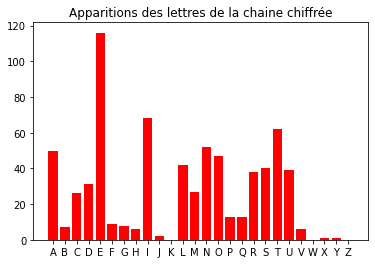

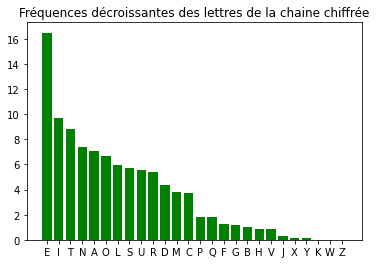

In [115]:
# ENTRER VOTRE CODE ICI
#raise NotImplementedError()
fichier = open('93.txt', 'r')
texte = fichier.read()
fichier.close()

chaine = traiteChaine(texte)
chaineChiffree = chiffrement(chaine, 'VIVRELAFRANCE')

# PEUT ÊTRE LONG ATTENTION #
chaineDechiffree, clePossible = decrypter(chaineChiffree)
print("Avec la clé : " + clePossible +", la chaine : " + chaineDechiffree)

chaineChiffree = chiffrement(chaine, 'AUREVOIRE')

# PEUT ÊTRE LONG ATTENTION #
chaineDechiffree, clePossible = decrypter(chaineChiffree)
print("Avec la clé : " + clePossible +", la chaine : " + chaineDechiffree)



apparitions = nombreApparitions(sortie)
freq = frequences(apparitions, sortie)

plt.bar(listeMaj, apparitions.values(), color='red')
plt.title('Apparitions des lettres de la chaine chiffrée')
plt.show()

frequDecroissantes = {k: v for k, v in sorted(freq.items(), key=lambda item: item[1], reverse=True)}

plt.bar(frequDecroissantes.keys(), frequDecroissantes.values(), color='green')
plt.title('Fréquences décroissantes des lettres de la chaine chiffrée')
plt.show()

Faire de même avec les histogrammes de fréquences d'apparition des bigrammes sur le texte chiffré. 

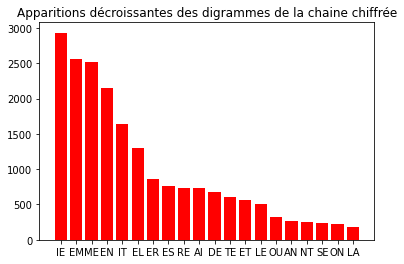

In [116]:
# ENTRER VOTRE CODE ICI
#raise NotImplementedError()
apparitionsDigrammes = nombreDigrammes(digrammes, chaineChiffree)
apparitionsDigrammesDecroissantes = {k: v for k, v in sorted(apparitionsDigrammes.items(), key=lambda item: item[1], reverse=True)}
plt.bar(apparitionsDigrammesDecroissantes.keys(), apparitionsDigrammesDecroissantes.values(), color='red')
plt.title('Apparitions décroissantes des digrammes de la chaine chiffrée')
plt.show()

**Question bonus :** Quelle serait, selon vous, la clé la plus robuste ?

VOTRE REPONSE ICI

In [ ]:
Leon Battista Alberti invente et publie le premier chiffre polyalphabétique. Il
conçoit un cadran chiffrant pour simplifier le processus. Cette classe de chiffre n'a
pas été apparemment cassée jusqu'aux années 1800. Alberti a aussi écrit
largement sur l'état de l'art dans des chiffres, en plus de sa propre invention. Ces
chiffres polyalphabétiques étaient beaucoup plus robustes que le nomenclateur
qu'utilisaient les diplomates de l'époque. Alberti inventa aussi le surchiffrement
codique. Mais le génie d'Alberti était trop en avance sur son temps et ce n'est que
400 ans plus tard, vers la fin du 19e siècle, que les principales puissances
mondiales commencèrent à surchiffrer leurs codes mais par des procédés bien plus
simples.